In [1]:
% matplotlib inline
print("Hello, HW 04!")

Hello, HW 04!


# Задание 1

a)  $ H_1 = x_i \ge a $  

$k = 2$ // BreakPoint  
Для одой точки всё хорошо. Для двух точек $x_1, x_2,\ \  x_1 <= x_2$ нет набора, на котором можно все дихотомии различать, пример: $x_1 = +1, x_2 = -1$  

$ VC_dim = k - 1 =  1$  

$ m_{H_1}(N) =  N + 1$ // правильно разбивает только такие пометки точек, для которых слева от а все -1, а справа - все +1. А число типов таких наборов = N + 1 == число промежутков между точками

b) $ b \le x_i \le a $  

$k = 3$  
Для 3 последовательных слева направо точек уже не получится: +1, -1, +1, и все +1 в интервал мы не засунем.  

$VC_dim = k - 1 = 2$   

$m_H(N) = C_{N+1}^{2}$  -- число способов выбрать границы интервала, где будут только +1

# Задание 2

In [2]:
# old
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import cdist
from sklearn.metrics import auc



def get_data(filename='blobs2.csv'):
    df = pd.read_csv(filename)
    return df

In [8]:
# TRY1
def perceptron_simple(df: pd.DataFrame, max_iterations=100):
    data = get_data()
    labels = data.iloc[:, -1].values
    # print(labels.shape)
    N = labels.shape[0]

    xs = data.iloc[:, 0:-1].values
    # print(xs.shape)

    labels = np.asarray([1.0 if x == 1 else -1.0 for x in labels]) \
        .reshape(N, 1)
    # print(labels.shape)

    ones = np.ones(N)
    X = np.c_[ones.T, xs]

    w0 = np.random.rand(X.shape[1])

    w_best = w0
    matched_no_best = 0

    for iterations in range(max_iterations):
        res = np.sign(np.dot(w0, X.T).reshape(N, 1))
        matched_no = (res == labels).sum()
        if matched_no > matched_no_best:
            w_best = w0.copy()
            matched_no_best = matched_no

        where_ok = (res == labels)
        where_not_matched_indices = np.argwhere(where_ok != True)[:, 0]

        X_not_matched = np.take(X, where_not_matched_indices, axis=0)

        for i in range(X_not_matched.shape[0]):
            w0 += labels[where_not_matched_indices[i]] * X_not_matched[i]

    print("\nacc = {}".format(n/N))

    return w_best, matched_no_best


In [9]:
w, n = perceptron_simple(get_data(), 1000)
print(n)
print(w)



acc = 0.985
985
[ 832.78707347   66.67936978 -346.87510341]


In [13]:
def print_result(w: np.ndarray, df: pd.DataFrame):
    points_0 = df.loc[df['label'] == 0]
    points_1 = df.loc[df['label'] == 1]
    plt.plot(points_0['x'], points_0['y'], 'o')
    plt.plot(points_1['x'], points_1['y'], 'o')

    w0 = w[0]
    w1 = w[1]
    w2 = w[2]

    # w0 + w1 x + w2 y = 0
    xx = np.linspace(-2, 6, 1000)
    yy = [((-w0 - w1 * x) / w2) for x in xx]
    plt.plot(xx, yy)

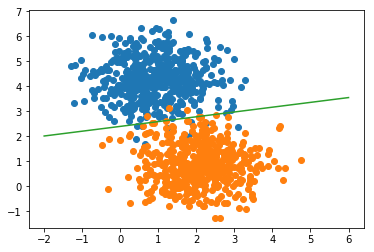

In [15]:
print_result( w, get_data())

# Задание 3


In [52]:
def perceptron_deg(df: pd.DataFrame, max_iterations=100, deg=2):
    data = get_data()
    labels = data.iloc[:, -1].values
    N = labels.shape[0]

    labels = np.asarray([1.0 if x == 1 else -1.0 for x in labels]) \
        .reshape(N, 1)

    ones = np.ones(N).reshape(N, 1)
    x = df['x'].values.reshape(N, 1)
    y = df['y'].values.reshape(N, 1)

    degs = [(x, y) for x in range(deg + 1) for y in range(deg + 1) if
            1 < x + y <= deg]
    
    X = np.c_[ones, x, y]

    for x_deg, y_deg in degs:
        column = (x ** x_deg) * (y ** y_deg)
        X = np.c_[X, column]  # slow, slow

    w0 = np.random.rand(X.shape[1])
    print(w0)

    w_best = w0
    matched_no_best = 0

    for iterations in range(max_iterations):
        res = np.sign(np.dot(w0, X.T).reshape(N, 1))
        matched_no = (res == labels).sum()
        if matched_no > matched_no_best:
            w_best = w0.copy()
            matched_no_best = matched_no

        where_ok = (res == labels)
        where_not_matched_indices = np.argwhere(where_ok != True)[:, 0]

        X_not_matched = np.take(X, where_not_matched_indices, axis=0)

        for i in range(X_not_matched.shape[0]):
            w0 += labels[where_not_matched_indices[i]] * X_not_matched[i]

    ############ draw
    points_0 = df.loc[df['label'] == 0]
    points_1 = df.loc[df['label'] == 1]
    plt.plot(points_0['x'], points_0['y'], 'o')
    plt.plot(points_1['x'], points_1['y'], 'o')

    PTS = 500
    xx = np.linspace(-2, 7, PTS)
    yy = np.linspace(-2, 7, PTS)
    X, Y = np.meshgrid(xx, yy, indexing='ij')
    Z = np.zeros((PTS, PTS))

    for i in range(PTS):
        for j in range(PTS):
            x_p = X[i, j]
            y_p = Y[i, j]

            # generate vec like [1, x_p, y_p, x_p * y_p, x_p ** 2, y_p ** 2]
            vec = [1, x_p, y_p]
            for x_deg, y_deg in degs:
                z = (x_p ** x_deg) * (y_p ** y_deg)
                vec.append(z)

            vec = np.asarray(vec)

            z = np.dot(w0, vec)
            Z[i, j] = z
    plt.contour(X, Y, Z, 0)
    
    print("\nacc = {}".format(matched_no_best / N))

    return w_best, matched_no_best

[0.68432725 0.56788578 0.3137839  0.78263473 0.32423112 0.89095611]

acc = 0.985


array([ 980.68432725, 2060.94297473,  533.14840826, -348.27403249,
       -821.92824039,  183.19780248])

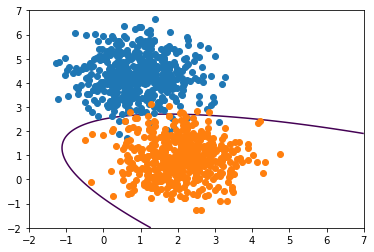

In [53]:
# deg = 2
W_deg, matched_no_deg = perceptron_deg(get_data(), 10000, 2)
W_deg

[0.82039595 0.13149573 0.60085921 0.30535138 0.05669903 0.67910964
 0.53978273 0.5255704  0.40668833 0.48891832]

acc = 0.984


(array([ 4133.82039595,  3411.24427629,  6462.58106228,  8335.51778854,
        -5016.09996361,  3832.68250549,   766.40121761,  2936.55932793,
        -2547.69218071,   -97.14839117]), 984)

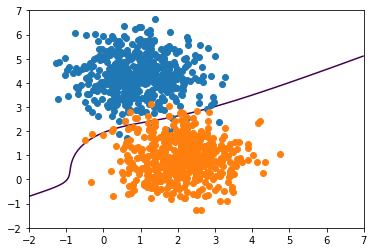

In [54]:
# deg = 3
perceptron_deg(get_data(), 1000, 3)

[0.78361844 0.74419346 0.31244044 0.2546685  0.59003517 0.3424099
 0.34308658 0.35868211 0.03996842 0.52264119 0.09632392 0.68005918
 0.85040813 0.78443497 0.05942891]

acc = 0.986


(array([  9144.78361844,   7833.88189186,  15429.40864108,  27664.24514571,
         36818.27584228, -26089.8604771 ,  12286.83789996,  18549.4982488 ,
         11196.24320744,   8447.19288655,   7416.85287489,  -6805.54592799,
          7566.30735218, -13043.23002435,   3243.37493035]), 986)

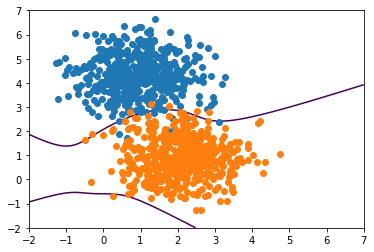

In [55]:
# deg = 4

perceptron_deg(get_data(), 1000, 4)